---
title: "Multiclass classification with Neural Networks"
author: "Marcin Płodzień"
toc: true
number-sections: true
highlight-style: pygments
jupyter: python3
skip_showdoc: true
skip_exec: true
---

# Multiclass classification task: one-hot encoding

Let's consider problem of data classification when each trainig sample $\vec{x}$ has a label $y$ belonging to one class, where we have $J$ classes in total. Next, we can enumerate each class by index $j \in \{1,\dots, J\}$.

Multiclass classification problems can be considered as task for which each input sample $\vec{x}$ is equiped with the discrete probability distribution 

\begin{equation}
\begin{split}
p = [p_1, p_2, \dots, p_J],\\
\sum_{i=j}^{J} p_j = 1,
\end{split}
\end{equation}
providing the information about what is the probability that given imput data $\vec{x}$ belongs to given class $j$.

In a particular scenario of a labeled data sample  $\vec{x}$ with label $y$ belonging to class with number $j = 3$ the corresponding probability distribution is

\begin{equation}
 p = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].
\end{equation}

As such, training sample $\vec{x}$ is equiped with a new label $p$.

Such a maping between labels $y$ to discrete probability distribution $p$ in the literature is so-called ${\it one-hot encoding}$. 

One-hot encoding is often used as a way to represent categorical variables in machine learning models. It has the advantage of being able to represent any number of categories, and the labels are mutually exclusive, which can be useful for certain types of models.

# Multiclass classification task

Let's consider problem of data classification when each trainig sample $\vec{x}$ has a label $y$ belonging to one class, where we have $J$ classes in total. Next, we can enumerate each class by index $j \in \{1,\dots, J\}$.

Multiclass classification problems can be considered as task for which each input sample $\vec{x}$ is equiped with the discrete probability distribution 

\begin{equation}
\begin{split}
p = [p_1, p_2, \dots, p_J],\\
\sum_{i=j}^{J} p_j = 1
\end{split}
\end{equation},
providing information what is the probability that given imput data $\vec{x}$ belongs to given class $j$.

In a particular scenario of a labeled data sample  $\vec{x}$ with label $y$ belonging to class with number $j = 3$ the corresponding probability distribution is

\begin{equation}
 p = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].
\end{equation}

As such, training sample $\vec{x}$ is equiped with a new label $p$.

Such a maping between labels $y$ to discrete probability distribution $p$ in the literature is so-called ${\it one-hot-encoding}$. 

One-hot encoding is often used as a way to represent categorical variables in machine learning models. It has the advantage of being able to represent any number of categories, and the labels are mutually exclusive, which can be useful for certain types of models.

# Categorical cross-entropy as a loss function

For multiclass classification task architecture of the Neural Network has output layer with $J$ nodes, corresponding to number of all classes in the training dataset. We interpret output of a neural network $\phi = [\phi_1, \phi_2, \dots, \phi_J]$ as a predicted discrete probability distribution $q = [q_1, q_2, \dots, q_J]$, after applying softmax activation function

\begin{equation}
\phi_j \to q_j = softmax(\phi_j) = \frac{e^{\phi_j}}{\sum_l e^{\phi_j}},
\end{equation}

which assures that $\sum_j q_j = 1$. As such, output $q = \{q_0, q_2, \dots, q_J\}$ can be interpreted as a discrete probability distribution, as well as $p$.

Now, the class prediction is taken as index $l$ corresponding to the maximum value of the class probability, i.e. the model prediction is a index $l$ for which $q_l$ has maximal value - i.e. it provides digit which is most likely a proper label for the input data.

During training the Neural Network we want to minimize distance between input class probability distribution $p$ and predicted class probability distribution $q$. 

The measure for comparing probability distribution is given by the a Kullback-Leibler divergence providing measure of how two probability distributions $p$ and $q$ differ:

\begin{equation}
K_{LB}(p || q) = \sum_{l} p_l\log\frac{p_l}{q_l}.
\end{equation}

We can see that

\begin{equation}
K_{LB}(p || q) = \sum_{l}p_l\log{p_l} -\sum_l p_l\log{q_l} \equiv {\cal H} - \text{CE}(p,q),
\end{equation}

where ${\cal H}$ is Shannon entropy for discrete probability distribution $p$, and

\begin{equation}
\text{CE}(p,q) = -\sum_l p_l\log{q_l}
\end{equation}
is called categorical-cross entropy.

Because the Shannon entropy does not depends on the trainable parameters  we can consider only categorical cross-entropy as a loss function.

# Example: Multiclass classification in MNIST dataset

In the context of the MNIST dataset our labels are digits assigned to $28\times28$ pixels images. In such a case, we can consider handwritten digits recognition as a classification problem with $J = 10$ different classes - each for each digit. We assume that each class has assigned arbitrary index $l$ enumerating classes.

In multiclass classification problem, one of the most popular techniqe for for data labels is so called ${\it one-hot encoding}$. One-hot encoding is a way of representing each label as a  $J$-dimensional vectors. Each vector has all elements set to $0$ except one element, whose position corresponds to arbitrary class index $l$.

For example, the digit $3$ has class index $4$ (we count from $0$), thus its label would be represented as 

\begin{equation}
 p = y_{\text{one-hot-encoded}} = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] \\
\end{equation} 

One-hot encoding is often used as a way to represent categorical variables in machine learning models. It has the advantage of being able to represent any number of categories, and the labels are mutually exclusive, which can be useful for certain types of models.

Let' import training data: images and labels

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Nx = 28   # number of pixels in x-direction
Ny = 28   # number of pixels in y-direction
N_class = 10

Now, we define simple feed-forward neural network with three hidden layers. First hidden-layer has $N_{h_1} = 128$ nodes, second hidden-layer has $N_{h_2} = 64$ nodes, while third hidden-layer has $N_{h_3} = 32$ nodes:

In [ ]:
# Define the model
N_h_1 = 128
N_h_2 = 64
N_h_3 = 32
model = nn.Sequential(nn.Linear(Nx*Ny, N_h_1),
                      nn.ReLU(),
                      nn.Linear(N_h_1, N_h_2),
                      nn.ReLU(),
                      nn.Linear(N_h_2, N_h_3),
                      nn.ReLU(),
                      nn.Linear(N_h_3, N_class)
                     )

Now, we define loss function $L$ as cross-entropy, and Adam as a optimizer for calculating gradient of the loss function $L$ with respect to trainable parameters.

In [ ]:
# Define the loss
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

Finally, we will train our model for $N_{\text{epoch}} = 10$ epochs, and collect value of the loss function at each epoch.

In [ ]:
N_epoch = 10

# Training loop
for epoch in range(0, N_epoch):
    running_loss = 0.0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784-dimensional vector
        images = images.view(images.shape[0], -1)
    
        # Clear the gradients
        optimizer.zero_grad()
                
        # One-hot encode the labels
        one_hot_labels = torch.zeros(labels.size(0), 10)
        one_hot_labels[torch.arange(labels.size(0)), labels] = 1
                
        # Forward pass
        output = model(images)
        
        # Calculate the loss
        loss = criterion(output, one_hot_labels)        

        # Backward pass
        loss.backward()  # automatic calculating the loss with respects to trainable parameters
        
        # Update the weights according to chosem optimization function. Here: Adam
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
    print(f"Epoch {epoch} - Training loss: {running_loss/len(trainloader)}")

Epoch 0 - Training loss: 0.44632343203623664
Epoch 1 - Training loss: 0.19825542715392006
Epoch 2 - Training loss: 0.14819248952368683
Epoch 3 - Training loss: 0.12276379527675031
Epoch 4 - Training loss: 0.10394735406708917
Epoch 5 - Training loss: 0.08960785535397504
Epoch 6 - Training loss: 0.08135678043622754
Epoch 7 - Training loss: 0.07523494778917844
Epoch 8 - Training loss: 0.06587286778553915
Epoch 9 - Training loss: 0.05905826543847512


Now, we can evaluate model on test dataset and check the confusion matrix:

Text(0.5, 1.0, 'Accuracy = 97.13%')

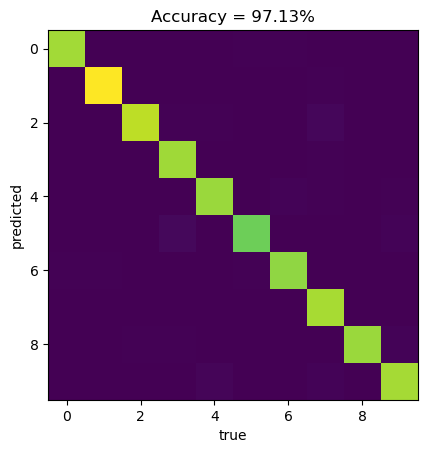

In [ ]:
import numpy as np
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
# Set the model to evaluation mode
model.eval()

# Make predictions on the test set
correct = 0
total = 0
confusion_matrix = np.zeros((10,10))
with torch.no_grad():
    for images, labels in testloader:
        # Flatten MNIST images into a 784-dimensional vector
        images = images.view(images.shape[0], -1)
        
        # Forward pass
        output = model(images)
        
        # Apply the softmax function to the output
        probs = torch.softmax(output, dim=1)
        
        # Get the class with the highest probability
        _, predicted = torch.max(probs, 1)
        
        # Update the correct and total counters
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        
        for i in range(0, predicted.shape[0]):           
            confusion_matrix[predicted[i].item(),labels[i].item()] += 1

# Calculate the accuracy
accuracy = correct / total

import matplotlib.pyplot as plt
plt.imshow(confusion_matrix)
plt.xlabel("true")
plt.ylabel("predicted")
plt.title("Accuracy = " + "{:2.2f}".format(accuracy*100) + "%")